In [32]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pandas as pd
from collections import Counter
import random
import shutil
from mstat.dataset import rnd_textfile, _check_len, leave1out, mutated_textfile
import matplotlib


def t2():
    path = 'dump_rnd.txt'
    np.random.seed(10012)
    alp = list('abcdef')
    prob = np.array([2, 0.1, 0.9, 1, 1, 1], dtype=np.float32) / len(alp)
    
    rnd_textfile(path, 504, Counter(('a' * 20) + 
                                   ('b')  + 
                                   ('c' * 9) + 
                                   ('d' * 10) + 
                                   ('e' * 10) + 
                                   ('f' * 10)
                                  ))
    print _check_len(path)
    with open(path) as fd:
        cnt = Counter(fd.read().rstrip())
    n = float(sum(cnt.values()))
    return pd.DataFrame([(k, v, v/n) for k, v in cnt.iteritems()], 
                        columns=['c', 'cnt', 'freq'])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


504


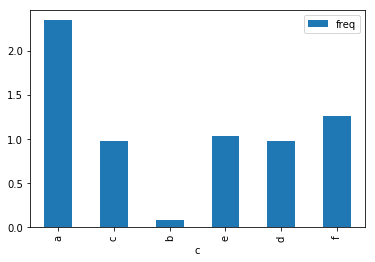

In [33]:
(t2().set_index('c')[['freq']] / 0.15).plot(kind='bar')

In [42]:
def mutated_textfile(orig_path, mut_path, num_mutations, alp):
    """
    create a new mutated text file from the given one
    """

    shutil.copyfile(orig_path, mut_path)
    mutate_block(mut_path, num_mutations, 0, _check_len(mut_path), alp)
    LG.info("created %s of length %d from %s of length %d",
            mut_path, _check_len(mut_path), orig_path, _check_len(orig_path))
    return 


def m1():
    p = './rnd_30s_dis_20t_aaaab.'
    with open(p+'s') as fd:
        orig = fd.read().strip()
    with open(p + 't') as fd:
        mut = fd.read().strip()

    for i, (a, b) in enumerate(zip(orig, mut)):
        print "%2d" % i,
        if a == b:
            print a
        else:
            print a, "-->", b
m1()

 0 a
 1 a
 2 a
 3 b --> a
 4 a --> b
 5 a
 6 b --> a
 7 a
 8 a
 9 a
10 a
11 a
12 a
13 a --> b
14 b --> a
15 a
16 a
17 a --> b
18 a
19 a
